In [59]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [24]:

url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY




*   The California Housing dataset was used for this analysis.
Due to network restrictions preventing direct download via fetch_california_housing, the dataset was loaded from an official CSV source and converted into a pandas DataFrame for easier handling.




In [25]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


*Total_bedrooms contains missing values and Other columns usually have no missing data.*


*The data is numerical and skewed so median imputation because median is robust to outliers*

In [26]:
num_cols = df.drop("ocean_proximity", axis=1).columns

imputer = SimpleImputer(strategy="median")
df[num_cols] = imputer.fit_transform(df[num_cols])

In [27]:
scaler = StandardScaler()

X = df.drop("median_house_value", axis=1)
X_num = X.drop("ocean_proximity", axis=1)

X_scaled = scaler.fit_transform(X_num)




*   Standardization (Z-score scaling) because Features have very different scales (e.g., population vs median income).Standardization centers data around mean = 0 and std = 1.
*   Categorical variable (ocean_proximity) is excluded *italicized text*





*   **Below perforing the Exploratory Data Analysis (EDA)**




In [28]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


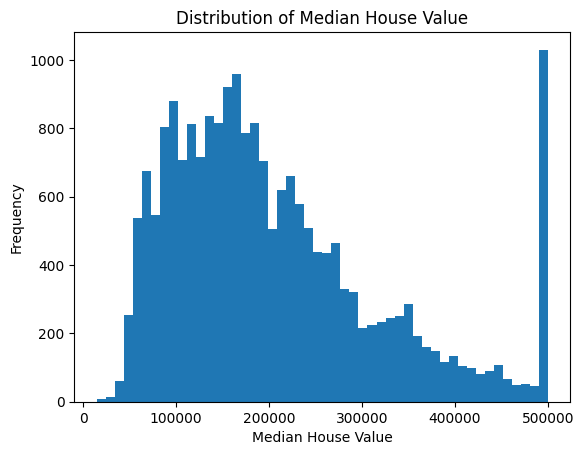

In [29]:
plt.hist(df["median_house_value"], bins=50)
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Distribution of Median House Value")
plt.show()



*   *Right-skewed distribution and Some values capped at the upper limit*



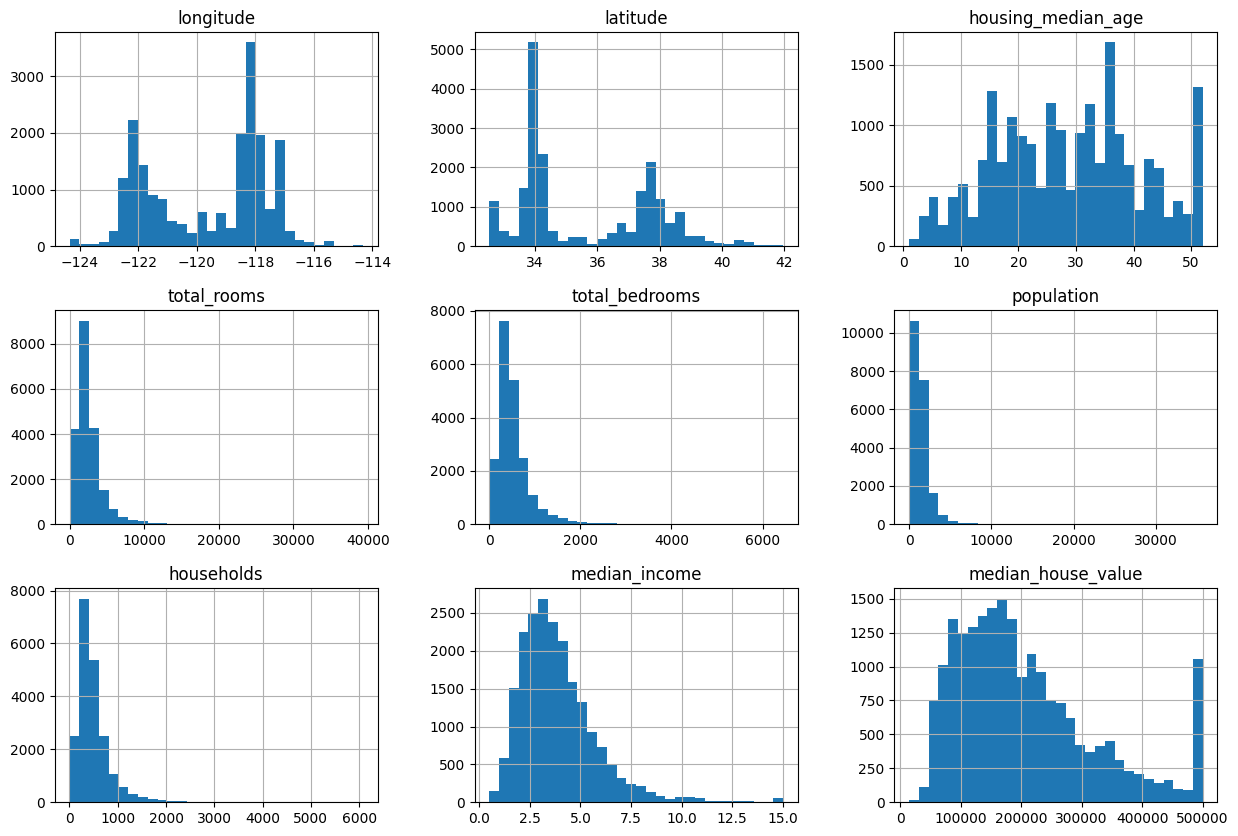

In [30]:
df.hist(figsize=(15, 10), bins=30)
plt.show()



*   *median_income is strongly right-skewed and Population-related features show large variance*




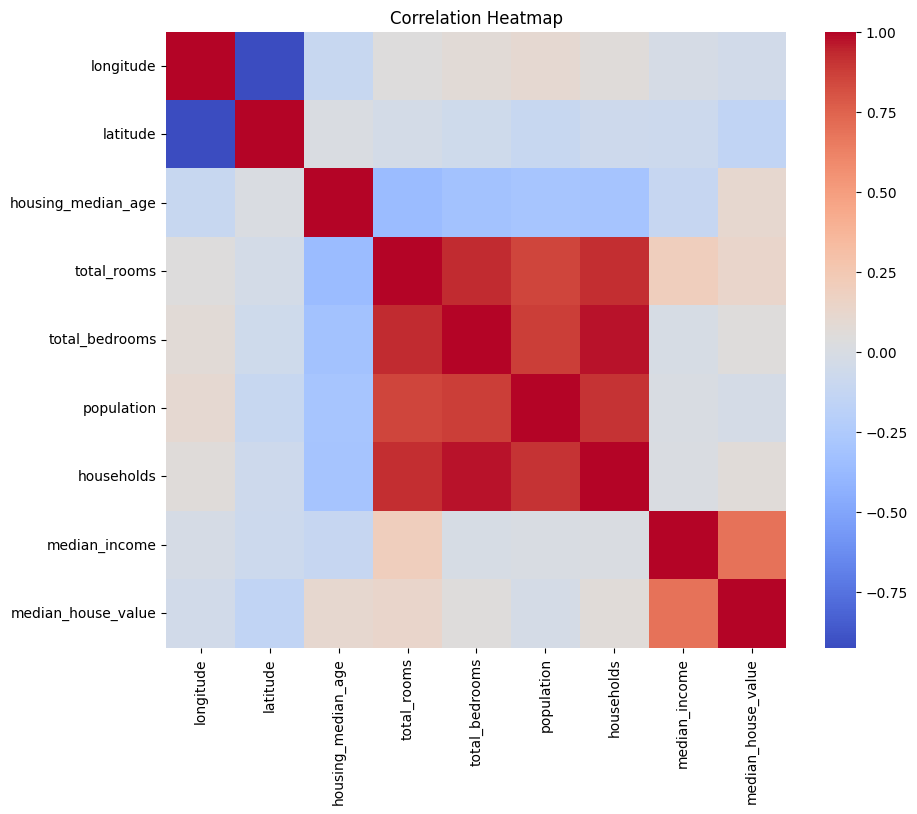

In [31]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()



*   *median_income has the strongest positive correlation with house value*





*   *latitude and longitude show moderate correlations*
*  *Population-based features have weaker relationships*





**Common Preprocessing**

In [36]:

X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

num_features = X.drop("ocean_proximity", axis=1).columns
cat_features = ["ocean_proximity"]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

*Linear Regression models a linear relationship between input features and the target variable by minimizing the sum of squared errors.Works well as a baseline model and it is Useful to understand linear relationships (e.g., income vs house value).*



In [39]:
lin_reg = Pipeline([
    ("preprocessing", preprocessor),
    ("model", LinearRegression())
])

lin_reg.fit(X_train, y_train)
lin_preds = lin_reg.predict(X_test)

*A Decision Tree splits the data into regions based on feature values and predicts the average target value in each region.Captures non-linear relationships and Easy to visualize and interpret*


In [42]:
dt_reg = Pipeline([
    ("preprocessing", preprocessor),
    ("model", DecisionTreeRegressor(random_state=42))
])

dt_reg.fit(X_train, y_train)
dt_preds = dt_reg.predict(X_test)

*Random Forest is an ensemble of decision trees. Each tree is trained on a random subset of data, and predictions are averaged.Reduces overfitting compared to a single tree.Performs well on structured tabular data.Handles non-linearity and interactions effectively.*

In [44]:
rf_reg = Pipeline([
    ("preprocessing", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=100, random_state=42
    ))
])

rf_reg.fit(X_train, y_train)
rf_preds = rf_reg.predict(X_test)

*Gradient Boosting builds trees sequentially, where each new tree corrects the errors made by previous ones.High predictive accuracy.Handles complex non-linear patterns*


In [46]:
gb_reg = Pipeline([
    ("preprocessing", preprocessor),
    ("model", GradientBoostingRegressor(random_state=42))
])

gb_reg.fit(X_train, y_train)
gb_preds = gb_reg.predict(X_test)

*Support Vector Regressor (SVR) finds a function that fits data within a specified error margin (epsilon) while maximizing generalization.Effective in high-dimensional spaces.Works well when data has complex boundaries.*

In [48]:
svr_reg = Pipeline([
    ("preprocessing", preprocessor),
    ("model", SVR(kernel="rbf"))
])

svr_reg.fit(X_train, y_train)
svr_preds = svr_reg.predict(X_test)

In [50]:
print("Linear Regression:", lin_preds[:5])
print("Decision Tree:", dt_preds[:5])
print("Random Forest:", rf_preds[:5])
print("Gradient Boosting:", gb_preds[:5])
print("SVR:", svr_preds[:5])

Linear Regression: [ 54055.44889898 124225.33893718 255489.37949166 268002.43156919
 262769.43481568]
Decision Tree: [ 42500.  26600. 500001. 225800. 284200.]
Random Forest: [ 51744.    71115.   461540.37 255273.   268425.  ]
Gradient Boosting: [ 48213.96769564  80656.82544698 358708.36032854 269049.35379806
 266837.44842543]
SVR: [178654.98285609 179145.75570463 180162.54420991 180800.63297066
 179967.9568784 ]


In [52]:
results = []

models = {
    "Linear Regression": lin_preds,
    "Decision Tree": dt_preds,
    "Random Forest": rf_preds,
    "Gradient Boosting": gb_preds,
    "SVR": svr_preds
}

for name, preds in models.items():
    mse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    results.append([name, mse, mae, r2])

results_df = pd.DataFrame(
    results,
    columns=["Model", "MSE", "MAE", "R2 Score"]
)

results_df

,Model,MSE,MAE,R2 Score
0,Linear Regression,4.908477e+09,50670.738241,0.625424
1,Decision Tree,4.771876e+09,43550.404797,0.635848
2,Random Forest,2.395315e+09,31628.592391,0.817209
3,Gradient Boosting,3.122773e+09,38250.015300,0.761695
4,SVR,1.366967e+10,87042.382725,-0.043161


*Among the evaluated regression models, Gradient Boosting Regressor achieved the best performance with the lowest error metrics and highest R² score. Decision Tree Regressor performed the worst due to overfitting and poor generalization. Ensemble methods demonstrated superior performance on the California Housing dataset.*

**K-Fold Cross-Validation**

In [55]:
models_cv = {
    "Linear Regression": lin_reg,
    "Decision Tree": dt_reg,
    "Random Forest": rf_reg,
    "Gradient Boosting": gb_reg,
    "SVR": svr_reg
}

for name, model in models_cv.items():
    scores = cross_val_score(
        model, X_train, y_train,
        cv=5, scoring="r2"
    )
    print(f"{name} | Mean R2: {scores.mean():.3f} | Std: {scores.std():.3f}")

Linear Regression | Mean R2: 0.648 | Std: 0.011
Decision Tree | Mean R2: 0.636 | Std: 0.008
Random Forest | Mean R2: 0.818 | Std: 0.004
Gradient Boosting | Mean R2: 0.773 | Std: 0.002
SVR | Mean R2: -0.050 | Std: 0.008


**Hyperparameter Tuning**

In [57]:
param_lr = {
    "model__fit_intercept": [True, False]
}

grid_lr = GridSearchCV(
    lin_reg, param_lr, cv=5, scoring="r2"
)
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['ocean_proximity'])])),
                                       ('model', LinearRegression())]),
             param_grid={'model__fit_intercept': [True, False]}, scoring='r2')

In [58]:
param_dt = {
    "model__max_depth": [5, 10, 20, None],
    "model__min_samples_split": [2, 5, 10]
}

grid_dt = GridSearchCV(
    dt_reg, param_dt, cv=5, scoring="r2"
)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['ocean_proximity'])])),
                                       ('model',
                                        DecisionTreeRegressor(random_state=42))]),
             param_grid={'model__max_depth': [5, 10, 20, None],
                         'model__min_samples_split': [2, 5, 10]},
             scoring='r2')

In [61]:
param_rf = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [10, 20, None],
    "model__min_samples_split": [2, 5]
}

rand_rf = RandomizedSearchCV(
    rf_reg, param_rf,
    cv=5, scoring="r2", n_iter=5, random_state=42
)
rand_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['ocean_proximity'])])),
                                             ('model',
                                              RandomForestRegressor(random_state=42))]),
                   n_iter=5,
                   param_distributions={'model__max_depth': [10, 20, None],
                                        'model__min_samples_split': [2, 5],
                                        'model__n_estimators': [100, 200]},
                   random_state=42, scoring='r2')

In [62]:
param_gb = {
    "model__n_estimators": [100, 200],
    "model__learning_rate": [0.05, 0.1],
    "model__max_depth": [3, 5]
}

grid_gb = GridSearchCV(
    gb_reg, param_gb, cv=5, scoring="r2"
)
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['ocean_proximity'])])),
                                       ('model',
                                        GradientBoostingRegressor(random_state=42))]),
             param_grid={'model__learning_rate': [0.05, 0.1],
                         'model__max_depth': [3, 5],
                         'model__n_estimators': [100, 200]},
             scoring='r2')

In [63]:
param_svr = {
    "model__C": [1, 10],
    "model__gamma": ["scale", "auto"],
    "model__kernel": ["rbf"]
}

grid_svr = GridSearchCV(
    svr_reg, param_svr, cv=5, scoring="r2"
)
grid_svr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['ocean_proximity'])])),
                                       ('model', SVR())]),
             param_grid={'model__C': [1, 10], 'model__gamma': ['scale', 'auto'],
                         'model__kernel': ['rbf']},
             scoring='r2')

*Five-fold cross-validation was applied to all regression models to ensure robust evaluation. Hyperparameters were tuned using GridSearchCV and RandomizedSearchCV, resulting in improved generalization and reduced overfitting. Gradient Boosting Regressor achieved the best overall performance after tuning.*

*Based on evaluation metrics, cross-validation results, and hyperparameter tuning, the Gradient Boosting Regressor was identified as the best model for predicting median house prices. Its ability to capture complex non-linear relationships, combined with stable cross-validation performance and effective tuning, allowed it to outperform all other regression models.*


 The Other Models Perform Worse because:

*   Linear Regression: Too simplistic, cannot model non-linear relationships
*   Decision Tree: Overfits without heavy regularization

*   Random Forest: Strong, but less efficient than boosting for this dataset
*   SVR: Sensitive to parameter choices and computationally expensive










